# CONTEXTO

O objetivo deste projeto é aplicar técnicas de análise exploratória e regressão para identificar quais características afetam mais os preços das casas no Mercado Habitacional de Melbourne.

# PRÉ-PROCESSAMENTO DE DADOS

A primeira etapa é carregar os dados e obter um melhor entendimento das informações que cada coluna contém.



In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
path = '/content/drive/MyDrive/Profissional/Minicurso CT - Primeiros passos com Data Science/02. Terça/Melbourne_housing_FULL.csv'
dataset = pd.read_csv(path)

In [3]:
print(dataset.shape)

# View first few records
dataset.head()

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# TIPOS VARIÁVEIS

### Variáveis ​​categóricas
Com base nas informações abaixo, as seguintes variáveis: 'Subúrbio', 'Endereço', 'Tipo', 'Método', 'VendedorG', 'Área do Conselho', 'Nome da região' precisarão ser especificadas como categorias em vez de objetos gerais.

Além disso, a variável Date precisará ser convertida em um objeto de data.

In [4]:
# View data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    dataset[colname] = dataset[colname].astype('category')  

In [6]:
# Convert to date object
dataset['Date'] = pd.to_datetime(dataset['Date'])

### Variáveis ​​Numéricas

Um resumo estatístico das variáveis ​​numéricas acima indica que o Postcode está sendo tratado como numérico quando deveria ser identificado como categórico. Este recurso precisará ser convertido para o tipo de dados correto

In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [8]:
# Convert numeric variables to categorical
num_cats = ['Postcode']  

for colname in num_cats:
    dataset[colname] = dataset[colname].astype('category')   

# Confirm changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

### Variáveis ​​duplicadas

De acordo com a documentação do conjunto de dados, 'Rooms' e 'Bedroom2' contêm informações sobre o número de quartos de uma casa, mas relatados de fontes diferentes. Vou investigar essas colunas mais a fundo para determinar se uma deve ser removida do conjunto de dados.

In [9]:
# Examine Rooms v Bedroom2
dataset['Rooms v Bedroom2'] = dataset['Rooms'] - dataset['Bedroom2']
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,0.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,0.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


As diferenças entre essas variáveis ​​são mínimas, portanto, manter ambas seria apenas duplicar as informações. Assim, o recurso Bedroom2 será removido do conjunto de dados para permitir uma melhor análise downstream.

In [10]:
# Drop columns
dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1)

# Engenharia de Recursos

O conjunto de dados contém o ano em que a casa foi construída. Embora isso esteja sendo medido pelo ano específico, o que essa variável está realmente investigando é a idade da casa. Como tal, a idade local pode ser expressa em termos de histórica (maior que 50 anos) vs não histórica (menos de 50 anos) para obter o cerne desta informação de uma forma mais condensada, permitindo uma melhor análise e visualização.

In [11]:
# Add age variable
dataset['Age'] = 2017 - dataset['YearBuilt']

# Identify historic homes
dataset['Historic'] = np.where(dataset['Age']>=50,'Historic','Contemporary')

# Convert to Category
dataset['Historic'] = dataset['Historic'].astype('category')

### MISSING DATA

Com base em uma rápida olhada no número de entradas para cada variável, parece haver informações ausentes no conjunto de dados. Explorarei quais recursos estão faltando mais informações.


In [12]:
# Number of entries
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

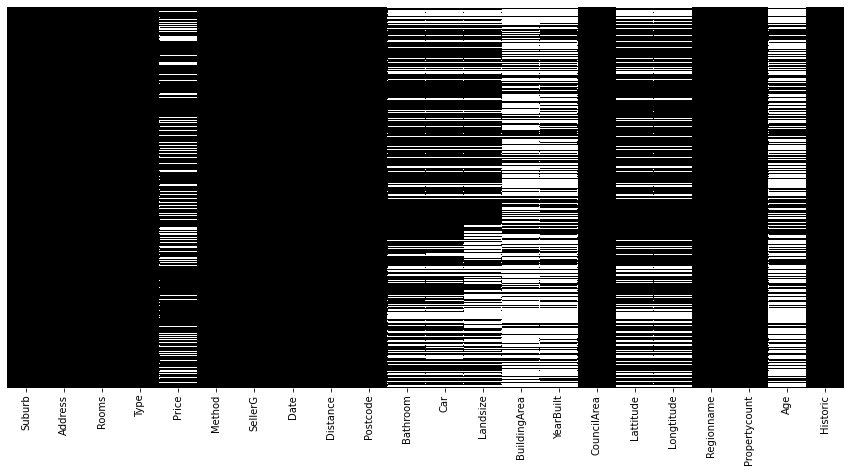

In [13]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [14]:
# Count of missing values
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

In [15]:
# Percentage of missing values
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

Há uma quantidade significativa de valores ausentes em Preço, Banheiro, Carro, Tamanho do terreno, Área de construção, Ano de construção, Área do conselho, Lattitude e Longitude. Para permitir uma análise mais completa, as observações sem dados serão removidas do conjunto de dados.

In [16]:
# View missing data
#dataset[dataset['Bedroom2'].isnull()]
#To remove rows missing data in a specific column 
# dataset =dataset[pd.notnull(dataset['Price'])]

# To remove an entire column
#dataset = dataset.drop('Bedroom2',axis = 1)

# Remove rows missing data
dataset = dataset.dropna()

# Confirm that observations missing data were removed  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   category      
 1   Address        8887 non-null   category      
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   category      
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   category      
 6   SellerG        8887 non-null   category      
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   category      
 10  Bathroom       8887 non-null   float64       
 11  Car            8887 non-null   float64       
 12  Landsize       8887 non-null   float64       
 13  BuildingArea   8887 non-null   float64       
 14  YearBuilt      8887 non-null   float64       
 15  CouncilArea    8887 

### OUTLIERS

O resumo estatístico revelou valores mínimos de zero para Landsize e BuildingArea que parecem estranhos. Além disso, há um preço máximo de $ 8,4 milhões no conjunto de dados. Essas observações precisarão ser investigadas posteriormente para determinar sua validade e se devem ser incluídas no conjunto de dados para análise.

In [17]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8887.0,-3.780450e+01,0.090549,-38.17436,-37.85856,-37.7987,-3.774894e+01,-3.740720e+01
Longtitude,8887.0,1.449914e+02,0.118919,144.42379,144.92000,144.9985,1.450646e+02,1.455264e+02


In [18]:
dataset[dataset['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,1.0,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [19]:
dataset[dataset['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,1.0,1.0,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,17.0,Contemporary
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,3.0,2.0,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,68.0,Historic
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,1.0,2.0,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,47.0,Contemporary
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,2.0,2.0,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,17.0,Contemporary
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,2.0,2.0,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0,17.0,Contemporary
22040,Prahran,6 Aberdeen Rd,3,h,1390000.0,S,Marshall,2017-08-19,4.6,3181.0,2.0,1.0,125.0,0.0,2002.0,Stonnington City Council,-37.85257,145.00296,Southern Metropolitan,7717.0,15.0,Contemporary
22507,Huntingdale,33 Beauford St,3,h,1205000.0,SA,FN,2017-09-23,12.3,3166.0,2.0,4.0,622.0,0.0,1960.0,Monash City Council,-37.90823,145.10851,Southern Metropolitan,768.0,57.0,Historic
22931,Balwyn North,1 Hosken St,5,h,2800000.0,S,Marshall,2017-08-26,9.7,3104.0,2.0,2.0,1173.0,0.0,1960.0,Boroondara City Council,-37.80385,145.09094,Southern Metropolitan,7809.0,57.0,Historic
22994,Brighton East,60 Cummins Rd,3,h,1650000.0,SP,Buxton,2017-08-26,10.3,3187.0,2.0,2.0,623.0,0.0,1920.0,Bayside City Council,-37.92698,145.02673,Southern Metropolitan,6938.0,97.0,Historic
23022,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,2017-08-26,12.1,3083.0,2.0,1.0,525.0,0.0,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0,52.0,Historic


In [20]:
dataset[dataset['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,2.0,1.0,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,1.0,1.0,0.0,60.00,1970.0,Yarra City Council,-37.80150,144.99720,Northern Metropolitan,4019.0,47.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,1.0,1.0,0.0,50.00,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,4.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,2.0,1.0,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,2.0,1.0,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,South Yarra,9/17 Howitt St,2,u,570000.0,VB,Ray,2017-07-29,2.7,3141.0,1.0,1.0,0.0,64.00,1965.0,Melbourne City Council,-37.84679,145.00206,Southern Metropolitan,14887.0,52.0,Historic
19685,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,2017-07-29,5.0,3182.0,1.0,1.0,0.0,82.00,1930.0,Port Phillip City Council,-37.85911,144.97900,Southern Metropolitan,13240.0,87.0,Historic
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,2017-07-29,12.9,3043.0,1.0,1.0,0.0,66.32,1980.0,Brimbank City Council,-37.69815,144.88019,Western Metropolitan,3296.0,37.0,Contemporary
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,2017-07-29,6.8,3016.0,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay City Council,-37.85588,144.89936,Western Metropolitan,6380.0,50.0,Historic


Depois de pesquisas adicionais, determinei que um terreno zero poderia ser indicativo de casas com “lote zero” - imóveis residenciais em que a estrutura chega até ou muito perto da borda da linha da propriedade. Portanto, essas observações são válidas e permanecerão o conjunto de dados.

No entanto, a observação com um BuildingArea 'zero' será removida porque não é possível que uma casa tenha um tamanho zero. Além disso, essa observação geralmente tem um preço alto de $ 8,4 milhões (o valor discrepante identificado anteriormente), confirmando ainda mais um possível erro no ponto de dados. Por esses dois motivos, essa observação será removida.

In [21]:
# Remove outlier
dataset = dataset[dataset['BuildingArea']!=0]

# Confirm removal
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8842.0,3.096811e+00,0.964072,1.00000,2.000000,3.0000,4.000000e+00,1.200000e+01
Price,8842.0,1.092554e+06,679110.471353,131000.00000,641250.000000,900000.0000,1.345000e+06,9.000000e+06
Distance,8842.0,1.118741e+01,6.810991,0.00000,6.400000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8842.0,1.645781e+00,0.722307,1.00000,1.000000,2.0000,2.000000e+00,9.000000e+00
Car,8842.0,1.691812e+00,0.976664,0.00000,1.000000,2.0000,2.000000e+00,1.000000e+01
Landsize,8842.0,5.229755e+02,1062.597994,0.00000,211.000000,477.0000,6.520000e+02,4.280000e+04
BuildingArea,8842.0,1.500694e+02,87.499764,1.00000,100.000000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8842.0,1.965692e+03,37.057287,1196.00000,1945.000000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8842.0,-3.780468e+01,0.090367,-38.17436,-37.858788,-37.7987,-3.774930e+01,-3.740720e+01
Longtitude,8842.0,1.449913e+02,0.118965,144.42379,144.919700,144.9983,1.450645e+02,1.455264e+02


# ANÁLISE EXPLORATÓRIA

### UNIVARIADO

A variável dependente (ou alvo) que estamos tentando prever nesta análise é o preço. Esta variável parece ser normalmente distribuída e inclinada para a direita. Ou seja, a maioria das casas está em torno de US $ 900.000, com alguns valores discrepantes em torno de US $ 8 milhões.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


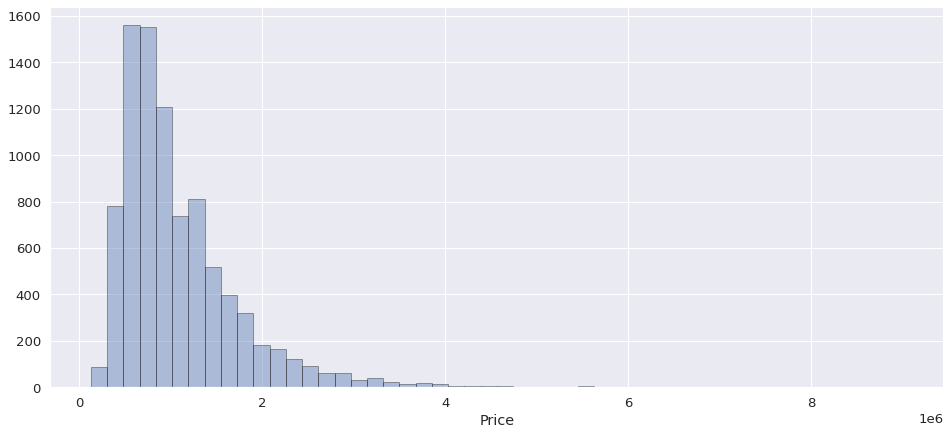

In [22]:
plt.figure(figsize=(16,7))
sns.distplot(dataset['Price'], kde = False,hist_kws=dict(edgecolor="k"))


Em seguida, visualizo as relações entre os recursos numéricos no conjunto de dados e o preço.

In [23]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

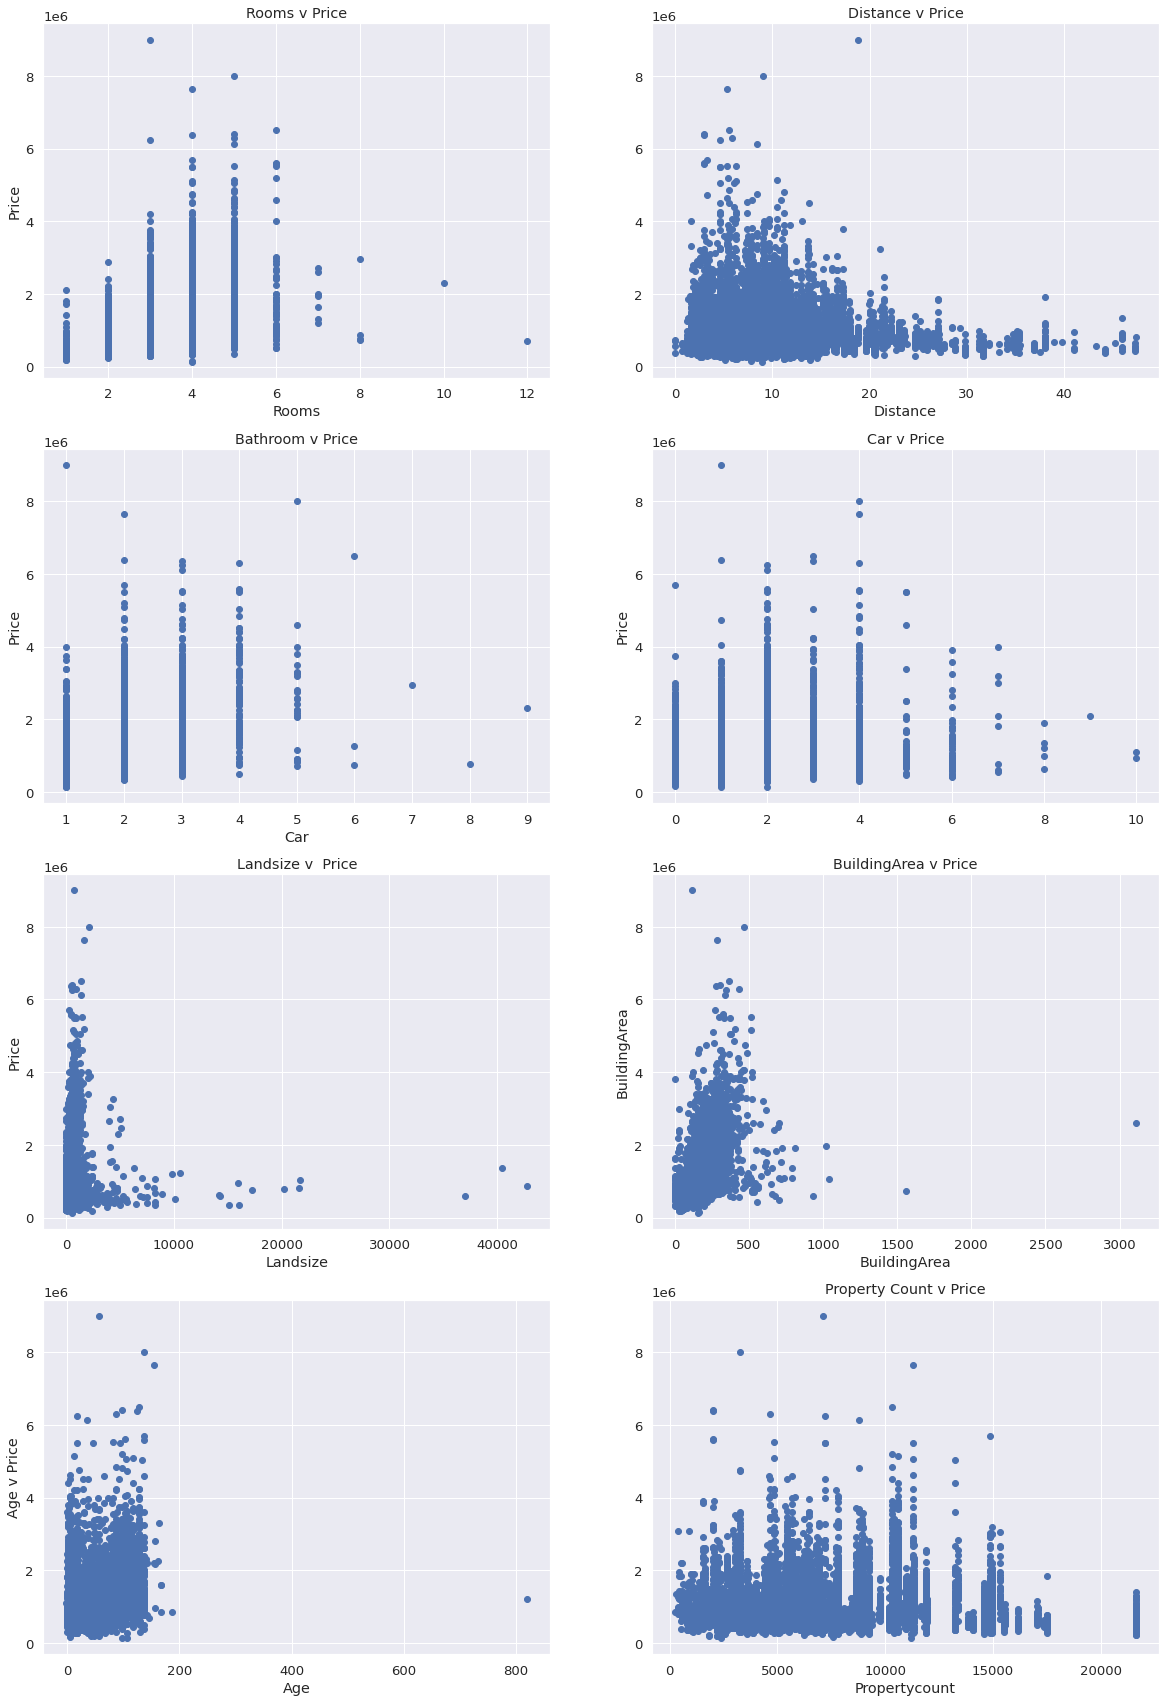

In [24]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

**INSIGHTS**

A maioria das residências no conjunto de dados tem 4 ou 5 quartos.
A tendência mais proeminente é que há uma correlação negativa entre a distância do Central Business District (CBD) de Melbourne e o preço. As casas mais caras (US $ 2 milhões ou mais) tendem a ficar a 20 km do CBD.

---

# CORRELAÇÃO

A seguir, exploro como todas as variáveis ​​estão correlacionadas umas com as outras.

Text(0.5, 1.0, 'Variable Correlation')

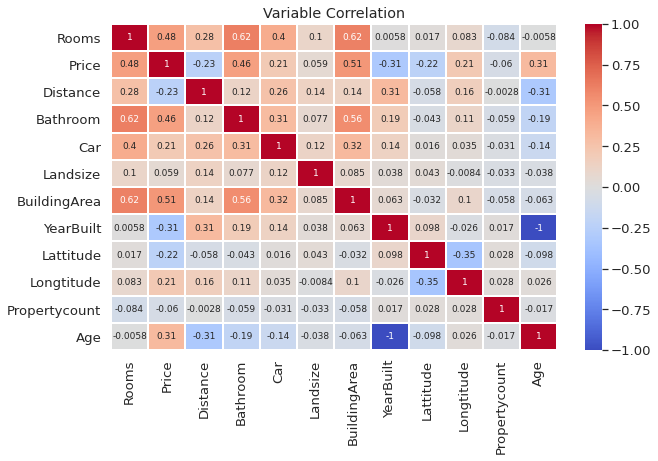

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

**Correlação Positiva Fraca**

Idade e Preço

**Correlação Positiva Moderada**

Quartos e preço
Banheiros e preço
Área de construção e preço

Os recursos Rooms, Bathroom e BuildingArea também estão moderadamente correlacionados uns com os outros, pois são medidas do tamanho da casa.

---

# APLICANDO REGRESSÃO LINEAR

In [26]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [28]:
# Split
# Create features variable 
X = dataset[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

# Create target variable
y = dataset['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state= 0)

In [29]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

# Métricas de avaliação de regressão

Três métricas de avaliação comuns para problemas de regressão:

- Erro médio absoluto (MAE)
- Erro médio quadrático (MSE)
- Erro quadrático médio (RMSE)

Todas as variações básicas sobre a diferença entre o que você previu e os 
valores reais.

**Comparando essas métricas:**

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular do que o MAE, porque o MSE "pune" erros maiores, tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que o MSE, porque o RMSE pode ser interpretado nas unidades "y" (unidades alvo).

Todas essas são funções de perda, porque queremos minimizá-las.

In [31]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 312564.46670670225
MSE: 221083216258.25677
RMSE: 470194.8705146163


O RMSE nos diz explicitamente quanto nossas previsões se desviam, em média, dos valores reais no conjunto de dados. Nesse caso, nossos valores previstos estão $ 508.212,42 de distância do valor real.

In [32]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5216286297986992


De acordo com o R-quadrado, 47,6% da variância da variável dependente é explicada pelo modelo.

---

# ANÁLISE RESIDUAL

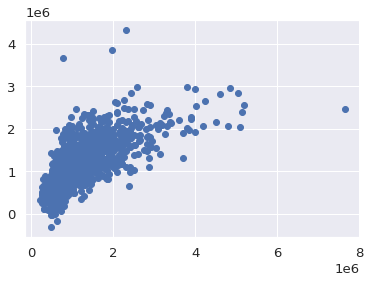

In [34]:
#Actual v predictions scatter
plt.scatter(y_test, y_pred)

### INTERPRETANDO OS COEFICIENTES

In [36]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,130781.994615
Distance,-28481.473952
Bathroom,255950.485267
Car,49936.398377
Landsize,24.128532
BuildingArea,2160.118289
Propertycount,-1.229619
Age,5491.481614


# CONCLUSÃO

- Os quartos estão associados a um aumento no preço de S136.531,55
- A distância está associada a uma redução no preço de S32.160,84
- O banheiro está associado a um aumento no preço de S236.639,21
- O espaço do carro está associado a um aumento no preço de S59.122,83
- Landsize está associado a um aumento no preço de S35,75
- BuildingArea está associado a um aumento no preço de S26,65,10
- Propertycount está associado a uma redução no preço de S0,05
- A idade está associada a um aumento no preço de S4.729,73

---
### REFERÊNCIA & FONTE
1.  [Melbourne Housing Market EDA e Regression](https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression)

